In [21]:
#스토캐스틱 지표 활용 > https://skyeong.net/287 참고
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

df = yf.download('005930.KS', start="2023-01-01", end="2023-06-26")
df['Date'] = df.index
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2023-06-19,71300.0,71700.0,70900.0,71200.0,71200.0,11100887,2023-06-19
2023-06-20,70700.0,71400.0,70400.0,71400.0,71400.0,11557883,2023-06-20
2023-06-21,70700.0,71200.0,70400.0,70500.0,70500.0,10626603,2023-06-21
2023-06-22,70200.0,71500.0,70100.0,71300.0,71300.0,11411007,2023-06-22
2023-06-23,72000.0,72200.0,71600.0,71600.0,71600.0,12329484,2023-06-23


In [8]:
# 일자(n,m,t)에 따른 스토캐스틱의 값을 구하기 위해 함수형태로 만듬
def Stochastic(df, n = 14, m = 5, t = 5):
    #입력받은 값이 dataframe이라는 것을 정의해줌
    df = pd.DataFrame(df)
    #n일중 최고가
    ndays_high = df.High.rolling(window = n, min_periods = 1).max()
    #n일중 최저가
    ndays_low = df.Low.rolling(window = n, min_periods = 1).min()
    #Fast%K 계산
    fast_k = ((df.Close - ndays_low) / (ndays_high - ndays_low)) * 100
    #Fast%D & Slow%K(둘이 같음) 계산
    slow_k = fast_k.ewm(span = m).mean()
    #Slow%D 계산
    slow_d = slow_k.ewm(span = t).mean()

    #df에 컬럼 추가
    df = df.assign(fast_k = fast_k, fast_d = slow_k, slow_k = slow_k, slow_d = slow_d)

    return df

# 단순 이동 평균(Simple Moving Average, SMA)
def SMA(data, period = 30, column = 'Close'):
    return data[column].rolling(window=period).mean()
# 상대적 강도 지수(RSI) 계산 함수
def RSI(data, period = 14, column = 'Close'):
    delta = data[column].diff(1) #
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down > 0] = 0
    data['up'] = up
    data['down'] = down

    AVG_Gain = SMA(data, period, column = 'up')
    AVG_Loss = abs(SMA(data, period, column = 'down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))

    data['RSI'] = RSI
    return data

In [22]:
df = Stochastic(df, 14, 5, 5)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Date,fast_k,fast_d,slow_k,slow_d
Date,,,,,,,,,,,
2023-06-19,71300.0,71700.0,70900.0,71200.0,71200.0,11100887,2023-06-19,44.444444,65.094826,65.094826,73.988210
2023-06-20,70700.0,71400.0,70400.0,71400.0,71400.0,11557883,2023-06-20,51.851852,60.680501,60.680501,69.552307
2023-06-21,70700.0,71200.0,70400.0,70500.0,70500.0,10626603,2023-06-21,18.518519,46.626507,46.626507,61.910374
2023-06-22,70200.0,71500.0,70100.0,71300.0,71300.0,11411007,2023-06-22,48.148148,47.133721,47.133721,56.984823
2023-06-23,72000.0,72200.0,71600.0,71600.0,71600.0,12329484,2023-06-23,59.259259,51.175567,51.175567,55.048404


Text(0, 0.5, 'WON')

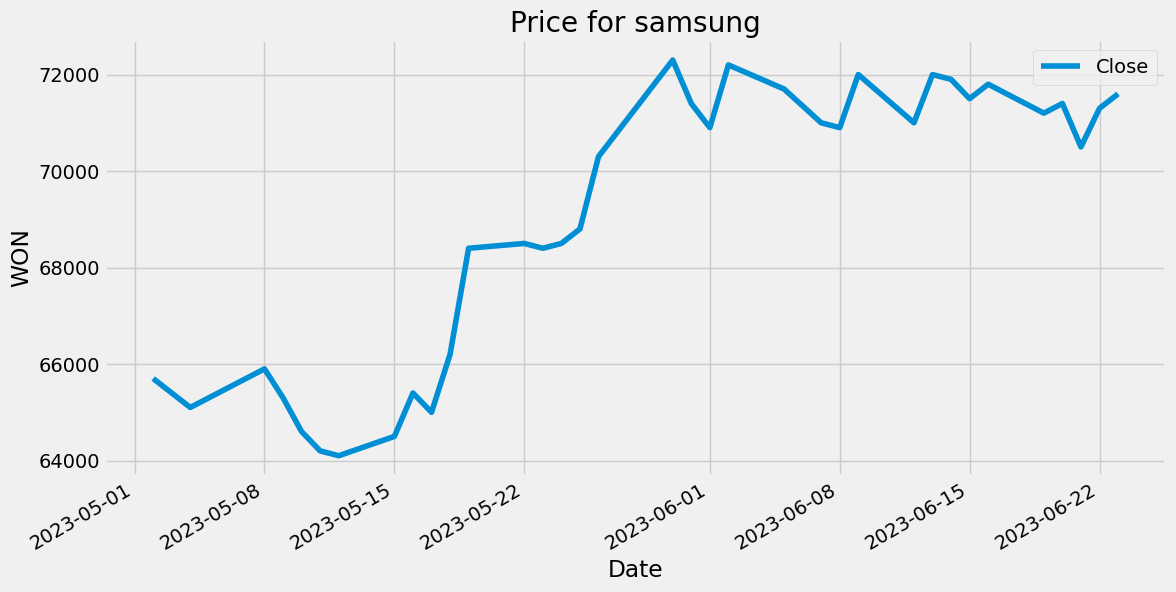

In [10]:
#시각화
column_list = ['Close'] #종가를 보여줘.

cut = df.Date>='2023-05-01' #기간을 조정했다.
df[column_list].loc[cut,:].plot(figsize=(12.2,6.4))
plt.title('Price for samsung')
plt.ylabel('WON')

Text(0, 0.5, 'Percent')

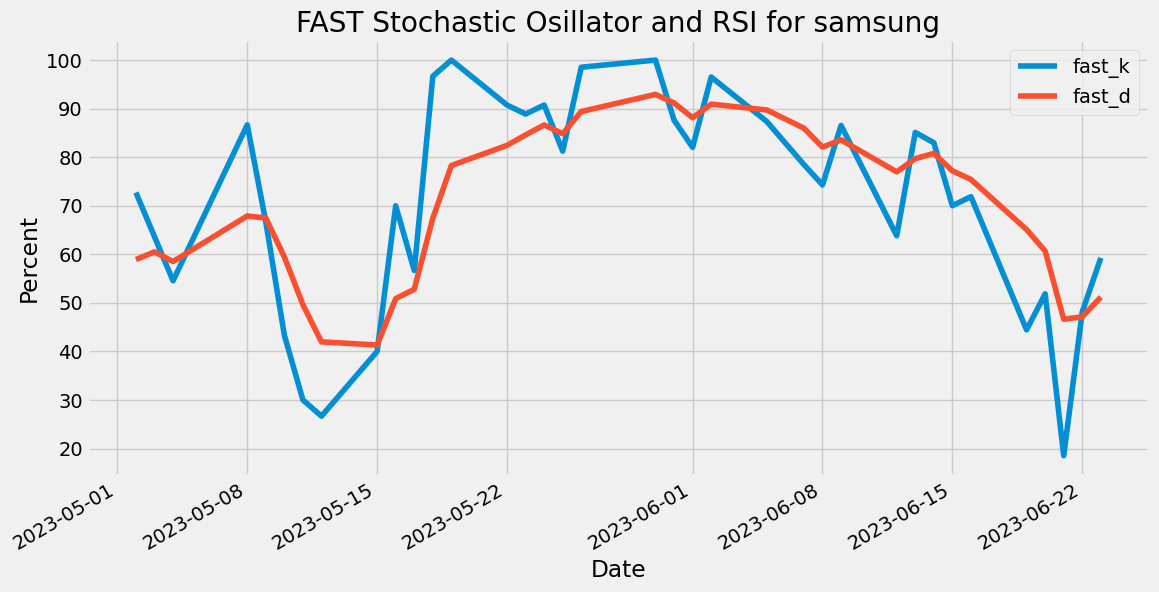

In [23]:
#스토캐스틱 FAST 시각화
column_list = ['fast_k','fast_d']

cut = df.Date>='2023-05-01'
df[column_list].loc[cut,:].plot(figsize=(12.2,6.4))
plt.title('FAST Stochastic Osillator and RSI for samsung')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

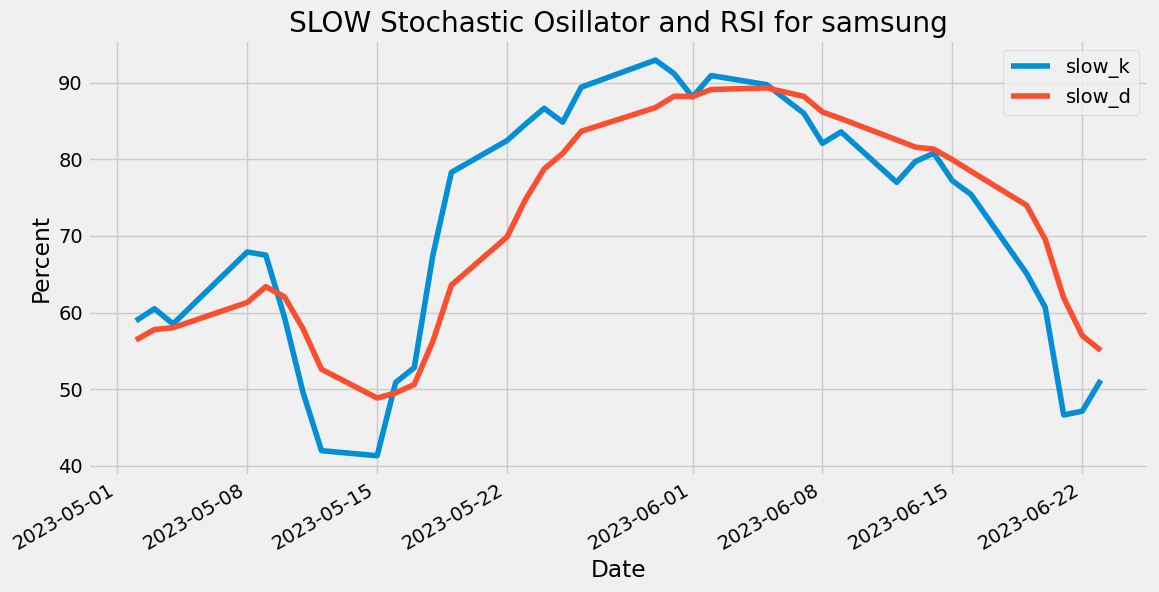

In [17]:
#스토캐스틱 SLOW 시각화
column_list = ['slow_k','slow_d']

cut = df.Date>='2023-05-01'
df[column_list].loc[cut,:].plot(figsize=(12.2,6.4))
plt.title('SLOW Stochastic Osillator and RSI for samsung')
plt.ylabel('Percent')